In [1]:
# installation des packages
# pandas numpy jupyter seaborn scikit-learn pydotplus

# azure_ml pas besoin sur ce cours
# pip install --upgrade azureml-sdk

# install xlrd package gère que xls
# pip install xlrd

# install openpyxl package pour gérer xlsx
# pip install openpyxl

#lié à pydotplus : graphviz = https://graphviz.org/download/
# linux : sudo apt-get install graphviz
# mac : brew install graphviz


In [2]:
# Importer des bibliothèques
# Une fois votre environnement local Visual Studio Code configuré, vous pouvez désormais importer les bibliothèques. Elles nous aideront à # importer et à nettoyer les données météorologiques, ainsi qu’à créer et tester le modèle de Machine Learning.

# Copiez le code suivant dans une cellule et exécutez-le pour importer les bibliothèques.
# Pandas library is used for handling tabular data
import pandas as pd
# NumPy is used for handling numerical series operations (addition, multiplication, and ...)
import numpy as np
# Sklearn library contains all the machine learning packages we need to digest and extract patterns from the data

from sklearn import linear_model, model_selection, metrics
from sklearn.model_selection import train_test_split

# Machine learning libraries used to build a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sklearn's preprocessing library is used for processing and cleaning the data 
from sklearn import preprocessing


# for visualizing the tree
import pydotplus
from IPython.display import Image

In [3]:


# Lire des données dans une variable
# Maintenant que toutes les bibliothèques sont importées, nous pouvons utiliser la bibliothèque pandas pour importer nos données. Utilisez  la commande pd.read_excel pour lire les données et les enregistrer dans une variable. Utilisez ensuite la fonction .head() pour imprimer  les cinq premières lignes des données. Cela permet de s’assurer que tous les éléments ont été lus correctement.

launch_data = pd.read_excel('RocketLaunchDataCompleted.xlsx')
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,1958-12-04,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26:00,Cloudy,NaN
1,NaN,1958-12-05,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26:00,Cloudy,NaN
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25:00,Cloudy,NaN
3,NaN,1958-12-07,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10:25:00,Partly Cloudy,NaN
4,NaN,1958-12-08,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12:24:00,Partly Cloudy,NaN


In [4]:
# Commencer à explorer les données
# Enfin, nous pouvons utiliser l’appel de fonction .columns pour afficher toutes les colonnes de nos données. Cela nous affiche les attributs de données. Vous verrez quelques attributs courants comme les noms des fusées précédentes dont le lancement était prévu, les dates prévues, si elles ont effectivement été lancées, et bien d’autres encore. Examinez ces colonnes et essayez de deviner lesquelles auront le plus grand impact sur la détermination du lancement d’une fusée.
launch_data.columns

Index(['Name', 'Date', 'Time (East Coast)', 'Location', 'Crewed or Uncrewed',
       'Launched?', 'High Temp', 'Low Temp', 'Ave Temp', 'Temp at Launch Time',
       'Hist High Temp', 'Hist Low Temp', 'Hist Ave Temp',
       'Percipitation at Launch Time', 'Hist Ave Percipitation',
       'Wind Direction', 'Max Wind Speed', 'Visibility',
       'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
       'Hist Ave Visibility', 'Sea Level Pressure',
       'Hist Ave Sea Level Pressure', 'Day Length', 'Condition', 'Notes'],
      dtype='object')

In [5]:
# Nettoyage des données
# La première étape à suivre pour nettoyer vos données consiste à remplacer toutes les valeurs manquantes par des éléments. Le remplacement de ces valeurs nécessite généralement une expertise en la matière, mais dans ce cas, vous utiliserez votre meilleur jugement. Certaines lignes (n’oubliez pas que les lignes représentent les jours) sont des données météorologiques ou de lancement manquantes.

# Pour commencer, obtenez d’abord une vue d’ensemble des données de lancement en entrant cette commande dans une cellule :

launch_data.info()

# Vous pouvez voir que Hist Ave Max Wind Speed, Hist Ave Visibilityet Hist Ave Sea Level Pressure n’ont pas de données.
#Il est logique que Wind Speed at Launch Time, Temp at Launch Time, Launched, Crewed or Uncrewed, Timeet Name n’aient que 60 valeurs, car les données incluent uniquement 60 lancements. Les autres sont les jours avant et après le lancement.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          60 non-null     object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             59 non-null     object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            60 non-null     object        
 5   Launched?                     60 non-null     object        
 6   High Temp                     299 non-null    float64       
 7   Low Temp                      299 non-null    float64       
 8   Ave Temp                      299 non-null    float64       
 9   Temp at Launch Time           59 non-null     float64       
 10  Hist High Temp                299 non-null    float64       
 11  Hist Low Temp                 29

In [6]:
#Voici quelques méthodes pour nettoyer les données :

#   Les lignes qui n’ont pas de "Y" dans la colonne "Launched" n’ont pas eu de lancement de fusée, donc faites ces valeurs manquantes "N".
#   Pour les lignes où il manque des informations sur le fait que la fusée était avec ou sans équipage, partez du principe qu’il n’y avait pas d’équipage. Une fusée sans équipage est plus probable, car il y a eu moins de missions avec équipage.
#   Lorsque la direction du vent est manquante, marquez-la comme "unknown".
#   Pour les données de condition manquantes, supposez qu’il s’agissait d’un jour classique et utilisez "fair".
#   Pour toutes les autres données, utilisez la valeur "0".

#Dans la cellule suivante, collez et exécutez le code suivant :
# To handle missing values, we will fill the missing values with appropriate values 
launch_data['Launched?'].fillna('N',inplace=True)
launch_data['Crewed or Uncrewed'].fillna('Uncrewed',inplace=True)
launch_data['Wind Direction'].fillna('unknown',inplace=True)
launch_data['Condition'].fillna('Fair',inplace=True)
launch_data.fillna(0,inplace=True)


In [7]:
# to see evolution = all lines have something in : no more empty lines
launch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          300 non-null    object        
 1   Date                          300 non-null    datetime64[ns]
 2   Time (East Coast)             300 non-null    object        
 3   Location                      300 non-null    object        
 4   Crewed or Uncrewed            300 non-null    object        
 5   Launched?                     300 non-null    object        
 6   High Temp                     300 non-null    float64       
 7   Low Temp                      300 non-null    float64       
 8   Ave Temp                      300 non-null    float64       
 9   Temp at Launch Time           300 non-null    float64       
 10  Hist High Temp                300 non-null    float64       
 11  Hist Low Temp                 30

In [8]:
# Manipulation de données
# Étant donné que les calculs sont mieux adaptés aux entrées numériques, convertissez tout le texte en nombres. À titre d’exemple, nous utiliserons 1 s’il s’agit d’une fusée avec équipage et 0 pour une fusée sans équipage.

## As part of the data cleaning process, we have to convert text data to numerical because computers understand only numbers
label_encoder = preprocessing.LabelEncoder()

# Three columns have categorical text info, and we convert them to numbers
launch_data['Crewed or Uncrewed'] = label_encoder.fit_transform(launch_data['Crewed or Uncrewed'])
launch_data['Wind Direction'] = label_encoder.fit_transform(launch_data['Wind Direction'])
launch_data['Condition'] = label_encoder.fit_transform(launch_data['Condition'])

In [9]:
# Examinons à nouveau toutes les données et vérifions qu’elles ont été nettoyées
launch_data.head()

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,0,1958-12-04,0,Cape Canaveral,1,N,75.0,68.0,71.00,0.0,...,16.0,15.0,0.0,0.0,0.0,30.22,0.0,10:26:00,0,0
1,0,1958-12-05,0,Cape Canaveral,1,N,78.0,70.0,73.39,0.0,...,14.0,10.0,0.0,0.0,0.0,30.2,0.0,10:26:00,0,0
2,Pioneer 3,1958-12-06,01:45:00,Cape Canaveral,1,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,0.0,0.0,30.25,0.0,10:25:00,0,0
3,0,1958-12-07,0,Cape Canaveral,1,N,76.0,57.0,66.04,0.0,...,10.0,10.0,0.0,0.0,0.0,30.28,0.0,10:25:00,6,0
4,0,1958-12-08,0,Cape Canaveral,1,N,79.0,60.0,70.52,0.0,...,12.0,10.0,0.0,0.0,0.0,30.23,0.0,12:24:00,6,0


In [10]:
# Exercice – Penser à des données supplémentaires à inclure

# Les choix que nous avons faits dans ce module étaient, au mieux, simplistes. Bien qu’une fusée n’ait pas été lancée la veille ou le lendemain du lancement du SpaceX Dragon le 30 mai 2020, cela ne signifie pas qu’un lancement de fusée aurait été reporté en raison des conditions météorologiques de ces jours-là. Ainsi, le fait de placer N dans la colonne Launched pour ces dates n’est pas vraiment exact.

# Ces modules vous guident à travers les étapes pratiques pour résoudre les problèmes rencontrés lors de l’exploration spatiale, mais vous êtes également censé trouver votre propre chemin. Le but ultime est de vous inspirer pour créer, imaginer et repousser les limites de ce que nous comprenons et des connaissances que nous détenons collectivement sur notre monde et au-delà.




# Voici quelques méthodes pour poursuivre votre processus d’apprentissage et de collecte de données :
#   Explorer les données plus en détail : Recherchez des articles et des rapports sur chaque lancement. Des considérations concernant la météo ont-elles été prises en compte avant le lancement ? Y avait-il des conditions météorologiques autour de ces dates qui auraient pu être inquiétantes ?
#   Explorer les données météorologiques manquantes : Qu’en est-il des dates auxquelles la NASA a choisi de ne pas lancer de fusées ? Au-delà de jours particuliers, y a-t-il eu des saisons que la NASA a évitées ? Quel type de profil météorologique ces saisons ont-elles tendance à présenter ?
#   Explorer les données de lancement manquantes : Pouvez-vous trouver des données sur les lancements qui ont été reportés en raison de la météo ? Existe-t-il des données provenant d’autres pays sur leurs lancements que vous pourriez intégrer ?
#   Explorer d’autres manipulations de données : Aurions-nous pu utiliser de meilleures valeurs pour compléter les données manquantes ?
#   Choisissez les données que vous souhaitez : Si vous aviez accès aux experts et aux sources de données de la NASA, qu’est-ce qui serait le plus important selon vous pour prendre une décision de lancement ou de report ? Si vous pouviez poser une question à un expert, quelle serait-elle ?
#   Évaluer des problèmes similaires : Existe-t-il des problèmes similaires que vous pouvez utiliser pour compléter ces données ? Par exemple, les retards d’avion dus à la météo dans la zone sont-ils également un indicateur ?

# Être un spécialiste des données ne consiste pas à disposer d’un ensemble complet de données et à y appliquer un algorithme. Il s’agit de partir de quelque chose de désordonné et probablement faux et d’apprendre de manière itérative. À la fin du parcours d’apprentissage, vous aurez appris quelque chose sur les lancements de fusées. Grâce à ces nouvelles connaissances, vous pouvez revenir à ce module et prendre des décisions plus éclairées.

In [11]:
# creation du modele

# Nettoyage des données supplémentaire
# Nous allons ensuite supprimer certaines colonnes qui ne sont pas nécessaires pour effectuer cette prédiction. Les colonnes telles que « Nom » nous donnent plus de contexte sur les données. Toutefois, le nom d’un lancement n’indique pas si la météo entraînera le report du lancement. Dans ce module, nous allons nous concentrer sur les colonnes sur la vitesse du vent, les conditions et les précipitations.

# First, we save the output we are interested in. In this case, "launch" yes and no's go into the output variable.
y = launch_data['Launched?']

# Removing the columns we are not interested in
launch_data.drop(['Name','Date','Time (East Coast)','Location','Launched?','Hist Ave Sea Level Pressure','Sea Level Pressure','Day Length','Notes','Hist Ave Visibility', 'Hist Ave Max Wind Speed'],axis=1, inplace=True)

# Saving the rest of the data as input data
X = launch_data

In [12]:
# Vous avez maintenant deux variables. La sortie est en y, et l’entrée se trouve dans X. Vous pouvez voir une vue d’ensemble des données d’entrée en examinant les colonnes de la variable X nouvellement créée :
# List of variables that our machine learning algorithm is going to look at:
X.columns

# La données d’entrée X représente la météo pour un jour particulier. Dans ce cas, nous ne sommes pas soucieux de la date ou de l’heure. Nous voulons que le profil de la météo de ce jour soit l’indicateur qui détermine si un lancement doit se produire, et non la date ou l’heure.

Index(['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
       'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
       'Hist Ave Temp', 'Percipitation at Launch Time',
       'Hist Ave Percipitation', 'Wind Direction', 'Max Wind Speed',
       'Visibility', 'Wind Speed at Launch Time', 'Condition'],
      dtype='object')

In [13]:
y

0      N
1      N
2      Y
3      N
4      N
      ..
295    N
296    N
297    Y
298    N
299    N
Name: Launched?, Length: 300, dtype: object

In [14]:
# Souvenez-vous de votre question : Pouvez-vous prédire si un lancement est susceptible de se produire en fonction de conditions météorologiques spécifiques ? Cette question a deux possibilités. Une fusée démarre, soit oui, soit non. Cette question est considérée comme un problème de classification à deux classes.

# Dans cette catégorie d’algorithme, vous pouvez choisir parmi de nombreux algorithmes spécifiques. Dans ce cas, vous allez explorer un arbre de décision à deux classes. La visualisation des résultats d’un arbre de décision donne des aperçus qui vous aideront à effectuer des itérations sur la collecte, le nettoyage et la manipulation des données dans le futur.

# Créer un modèle Machine Learning dans Python
# En utilisant Scikit-learn (https://scikit-learn.org/stable/index.html) , il est facile de créer le modèle Machine Learning dont vous avez besoin pour cet exercice. Collez ce code dans une autre cellule de Visual Studio Code :
# Create decision tree classifier 
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)

# Jetons un coup d’œil à la documentation (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree%20classifier#sklearn.tree.DecisionTreeClassifier?azure-portal=true) pour le classifieur de l’arbre de décision  et à l’importance des paramètres que nous avons spécifiés ici. Les deux paramètres que nous avons spécifiés sont random_state et max_depth.

#Le paramètre random_state est utilisé pour la plupart des algorithmes de Machine Learning. Il contrôle le caractère aléatoire de l’algorithme. Lorsque vous utilisez cet estimateur pour fractionner les données en données pour effectuer l’apprentissage avec et les données avec lesquelles effectuer le test, la valeur initiale fournie ici détermine le caractère aléatoire de cette division. L’unité suivante fournit plus d’informations sur le fractionnement des données.

#Le paramètre max_depth est un paramètre spécifique à une arborescence qui vous permet de définir l’étendue de la sortie du modèle. Dans ce cas, il n’est probablement pas informatif pour obtenir toutes les probabilités d’une condition météorologique spécifique et son effet potentiel sur la probabilité d’un lancement de fusée. La profondeur sera limitée à cinq pour réduire les connaissances acquises à ce qui est le plus souvent lié aux résultats.

In [15]:
# L’étape suivante consiste à fractionner vos données en données d’entraînement et de test. Si vous fournissez votre classifieur Machine Learning avec l’ensemble de vos données, vous n’aurez plus qu’à vous indiquer les données dont vous disposez. Elle ne produira pas de prédictions exactes.



#Pourquoi dois-je fractionner des données ?

#Une façon d’expliquer l’importance du fractionnement des données consiste à les comparer à un examen que vous pourriez entreprendre. Imaginez une classe formelle que vous pouvez suivre. Tout au long de la classe, vous voyez des exemples de problèmes et on vous dit les réponses. Ce scénario se produit dans les conférences, les devoirs et les examens de pratiques.

#Imaginez une classe où votre formateur vous a donné l’examen exact et la clé de l’examen (réponses) le jour précédant l’examen. Allez-vous réussir ce test haut la main ? Oui !

#Savez-vous si vous avez appris les concepts ? Non. Il est plus probable que vous ayez appris les réponses aux questions sur le test et non les concepts que l’examen essayait de tester.

#Si vous souhaitez vraiment apprendre, vous devez vous exercer avec des problèmes pour lesquels vous avez des réponses. Lorsque vous vous sentez à l’aise avec ces problèmes, essayez des problèmes pour lesquels vous ne connaissez pas encore les réponses. C’est fondamentalement ce que le classifieur fait pour « apprendre ».

#Fractionner les données
#Vous souhaiterez fractionner vos données en quatre nouvelles variables. Vous avez déjà X et y qui représentent votre entrée et votre sortie. À présent, il est temps de les fractionner en données d’entraînement et de test.

#En utilisant Scikit-learn et la fonction de fractionnement du classifieur, vous pouvez obtenir un échantillonnage aléatoire des X et des y qui correspondent dans l’ordre. Si les données n’ont pas été fractionnées de façon aléatoire mais que les premières 80 % des lignes ont été prises pour les données d’entraînement et que le reste était laissé à des fins de test, cela entraînerait des problèmes.

#Par exemple, supposons que les données sont triées par ordre de date. Si les 240 premières lignes ont été prises pour entraîner, vous entraîneriez votre modèle sur des données qui datent d’avant 1999. C’est un problème, car les capteurs peuvent avoir changé au fil du temps. Seule la recherche de données plus anciennes peut ne pas être un bon indicateur pour les décisions qui seraient prises avec la nouvelle technologie.

#Collez ce code dans une cellule de Visual Studio Code pour fractionner vos données :
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# Ce code sépare de manière aléatoire les données en quatre groupes : X_train, X_test, y_trainet y_test. Avec la fonction train_test_split de Scikit-learn, vous spécifiez quatre paramètres importants :
#   Données d’entrée : X - toutes les colonnes que nous souhaitons utiliser pour prédire un lancement.
#   Données de sortie : y - le résultat de chaque ligne (qu’il s’agisse d’une fusée lancée ou non).
#   Taille de test : 0.2 - Entraîner vos données sur 80 % et les tester sur 20 % est une division courante de la science des données.
#   État aléatoire : 99 - valeur de départ aléatoire qui modifiera le caractère aléatoire de la sélection des données.
# Vous pouvez revenir en arrière et modifier la taille du test et l’état aléatoire pour essayer d’autres options.

In [16]:
# entraîner et tester le modèle Machine Learning pour prédire la réussite du lancement de fusée
# Une fois les données réparties dans les sections entraînement et test, nous pouvons entraîner notre modèle Machine Learning. L’une des raisons pour lesquelles Python est un langage populaire pour la science des données et le Machine Learning est due à l’ensemble des bibliothèques qui existent pour prendre en charge l’étude des données. Comme nous l’avons vu, obtenir le modèle Machine Learning créé et le fractionnement des données était simple. L’ajustement et le test de notre modèle seront également simples.



# Ajuster le modèle
# L’étape suivante du cycle de vie de la science des données consiste à adapter le modèle aux données d’apprentissage. L’acte de « l’ajustement » est fondamentalement là où le modèle est en cours d’apprentissage. Ce processus a été décrit avec l’exemple baie. L’homme était en train d’être « ajusté » lorsqu’on a apporté une baie et qu’on leur a dit ce que c’était. Pour ajuster le modèle, vous appelez fit() sur le classifieur Machine Learning et transmettez les données X_train et y_train.

#L’ajustement du modèle revient à effectuer un examen pratique dans lequel vous avez accès aux réponses pour vous assurer que vous comprenez les concepts.
# Fitting the model to the training data
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [17]:
# Tester le modèle
#Le test de votre modèle est également facilité grâce aux bibliothèques que nous avons importées. Le test du modèle est semblable à faire l’examen. Vous fournirez X_test (20 % des données d’entrée que vous avez réservées à des fins de test) à la fonction de predict() du classifieur. Cette fonction retourne une liste de Y et N qui représente ce que le modèle pense qu’il se passerait si une tentative de lancement de fusée avait eu lieu en fonction d’un ensemble particulier de conditions météorologiques.

# Do prediction on test Data
y_pred = tree_model.predict(X_test)
print(y_pred)
# Combien de Y avez-vous obtenu ? Les prédictions sont-elles représentatives des données qui ont été entrées ? Ce n’est pas clair sans autres investigations, mais jusqu’à présent, la sortie contient ~ 9 Y réponses de 60 valeurs d’entrée. Environ 20 % du total des données ont généré un Y. Ce pourcentage représente environ 15 % des données prédites, donc il est relativement proche.

['N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'Y']


In [18]:
# Une comparaison simple du pourcentage de données qui a abouti à un lancement de Y est utile pour vérifier si le modèle est proche de la valeur correcte. Mais il est encore plus utile de noter réellement le modèle.

#Noter le modèle
#Comme pour un examen, l’apprentissage peut être mesuré à l’aide d’une note. Il existe une fonction à une seule ligne que vous pouvez appeler pour voir le degré de précision du modèle pour prédire si un lancement se produirait
# Calculate accuracy
tree_model.score(X_test,y_test)
# À l’aide de la fonction score() , vous transmettez les données d’entrée X_test et les données de sortie y_test pour « noter » le modèle. Plus la note est élevée, plus notre modèle est précis pour prédire le résultat d’un lancement de fusée basé sur les données météorologiques


#Comprendre la note
#Dans cet exemple, le modèle a une précision de 98,3%, ce qui est bien. En fait, avec la petite quantité de nettoyage et de manipulation de données que nous avons faits et avec les problèmes connus des données, cela semble un peu trop bien.

#Peut-être avons-nous les meilleures données et avons-nous correctement formé notre modèle pour obtenir des résultats précis. Mais peut-être que ce taux de précision signifie que nous sommes doués pour deviner ces données fabriquées, donc cette note ne serait pas fiable dans le monde réel. Pour le contexte, une précision de 70 % avec un classifieur d’arbre de décision (quand il est exécuté pour la première fois) est courante.



#Comment pouvez-vous vous assurer que le score lui-même est une représentation exacte de la précision du modèle ?

#L’une des méthodes consiste à demander à un expert de remplir les données Y et N pour les dates de non-lancement, au lieu de deviner simplement N. Par exemple, la probabilité que le jour juste avant ou après un lancement puisse également être un bon jour de lancement est probablement plus élevée que nous l’avons représenté dans ces données.

0.9833333333333333

In [19]:
# visualiser le modèle Machine Learning

# L’un des avantages de l’utilisation d’un classifieur d’arbre de décision est la visualisation que vous pouvez utiliser pour mieux comprendre comment le modèle prend des décisions. À l’aide de graphviz et pydotplus, vous pouvez rapidement voir comment une décision est prise. Dans les itérations à venir, vous pouvez voir comment les décisions sont modifiées.

# Créer l’arborescence d’éléments visuels
# Pour créer une représentation visuelle du modèle, vous allez créer une fonction qui prend en tant que paramètres :
#   Données : tree - le modèle Machine Learning
#   Colonnes : feature_names -une liste des colonnes dans les données d’entrée
#   Sortie : class_names - une liste des options de classification (dans ce cas, oui ou non)
#   Nom du fichier : png_file_to_save - le nom du fichier dans lequel vous souhaitez enregistrer la visualisation
# Vous appelez la fonction export_graphviz() https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html de Scikit-learn , puis vous retournez une représentation d’image du graphique que vous donne Scikit-learn.
# Let's import a library for visualizing our decision tree.
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names,class_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    return Image(graph.create_png())

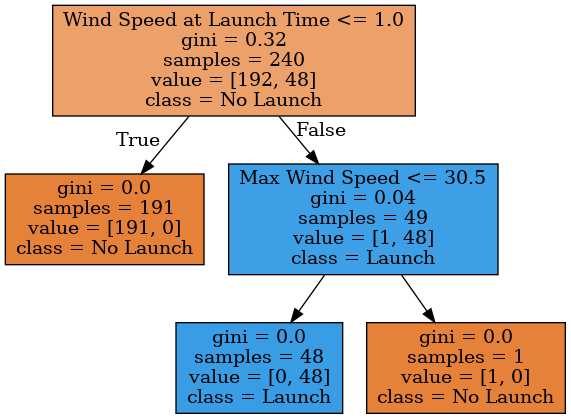

In [20]:
# L’appel de cette fonction est relativement simple :
#   Données : tree_model - le modèle que vous avez entraîné et testé précédemment
#   Colonnes : X.columns.values - la liste des colonnes dans l’entrée
#   Sortie : [yes,no] - les deux résultats possibles
#   Nom du fichier : decision_tree.png - le nom du fichier dans lequel vous souhaitez enregistrer l’image
# This function takes a machine learning model and visualizes it.
tree_graph_to_png(tree=tree_model, feature_names=X.columns.values,class_names=['No Launch','Launch'], png_file_to_save='decision-tree.png')


In [21]:
# Dans l’ensemble, lorsque nous examinons le jeu de données, nous avons 240 échantillons :

#192 sont des non-lancements
#48 sont des lancements
#Ce résultat est dû à notre stratégie de nettoyage des données, où nous supposons que tous les jours non étiquetés sont #des jours sans lancement.

#À l’aide des nouvelles étiquettes, nous pouvons dire « si la vitesse du vent était inférieure à 1,0, alors 191 des 240 échantillons ont deviné qu’aucun lancement n’était possible ce jour-là ». Ce résultat peut paraître étrange, mais en fonction des données, il est correct. Voici les preuves : Nous avons tracé la distribution de lancement et de non-lancement pour les jours pendant lesquels la vitesse du vent au moment du lancement < = 1 avant de supprimer la colonne plus haut dans ce notebook. Elle montre que, pour presque toutes les périodes, nous ne lançons pas.

In [22]:
#Comprendre la visualisation
#Cette arborescence simple vous montre que la fonctionnalité la plus importante des données était Wind Speed at Launch Time. Si la vitesse du vent était inférieure à 1,0, alors 191 des 240 échantillons ont été correctement identifiés comme des sans lancement. Nous voyons que 191 de ces échantillons nécessitaient seulement que la valeur Wind Speed at Launch Time soit inférieure à 1,0 pour deviner correctement les résultats, alors que les valeurs de plus de 1,0 ne nécessitaient plus d’informations.

#Cet aperçu n’est pas bon. Nous avons précédemment défini toutes les valeurs qui étaient vides à 0. Nous savons également que la plupart des valeurs qui ont été associées à l’heure de lancement étaient 0 car 60 % de nos données n’étaient pas liées à un lancement ou une tentative de lancement réel.

#À mesure que vous continuez à examiner l’arborescence, vous pouvez voir que Max Wind Speed est la seconde fonctionnalité la plus importante des données. Ici, vous pouvez voir que les 49 jours restants lorsque la vitesse maximale du vent était inférieure à 30,5, 48 des jours ont généré une sortie de lancement correcte et que l’une d’entre elles générait une sortie sans lancement.

#Ces données peuvent être plus intéressantes avec un contexte réel. Il n’y avait qu’un seul jour où un lancement était planifié et la valeur Max Wind Speed était supérieure à 30,5, le 27 mai 2020. Le lancement de Space X Dragon a été reporté au 30 mai 2020. Voici les preuves :
launch_data[(launch_data['Wind Speed at Launch Time'] > 1) & (launch_data['Max Wind Speed'] > 30.5)]

# Améliorer les résultats
#Avec cette visualisation, vous pouvez constater que certains composants sont devenus importants. Mais cette mise en évidence reposait sur des informations incorrectes.

#L’une des améliorations apportées consiste à déterminer la relation entre Max Wind Speed et Wind Speed at Launch Time pour les lignes qui contiennent ces informations. Ensuite, au lieu d’effectuer Wind Speed at Launch Time 0 pour les jours sans lancement, il aurait été possible d’obtenir l’estimation de ce qui se passerait au moment d’un lancement standard. Cette modification a peut-être mieux représenté les données.

#Pouvez-vous envisager d’autres méthodes pour améliorer les données ?

,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Percipitation at Launch Time,Hist Ave Percipitation,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Condition
292,0,86.0,70.0,75.02,74.0,87.0,70.0,79.0,0.28,0.15,4,32.0,10.0,25.0,2


In [23]:
# Exercice : prédire la réussite d’un lancement de fusée à l’aide de Machine Learning

#Enfin, il est temps de tester votre modèle avec des données qui n’ont jamais été trouvées dans votre jeu de données.
#Le 30 juillet 2020, la NASA a lancé le rover Perseverance vers Mars à partir du Cap Canaveral à 7:50 AM est.
#Collectez les données d’entrée pour le modèle :

#Équipage ou sans équipage
#Temp élevé
#Temp faible
#Temp moyenne
#Temp au moment du lancement
#Temp élevée historique
#Temp faible historique
#Temp moyenne historique
#Précipitation au moment du lancement
#Historique des précipitations moyennes
#Sens du vent
#Pointes de vent maximales
#Visibilité
#Vitesse du vent au moment du lancement
#Vitesse du vent max. hist moy.
#Historique de la visibilité moyenne
#Condition
#Vous pouvez trouver ces informations sur la plupart des sites météo. N’oubliez pas que les données doivent toutes être numériques.

#L’exemple suivant utilise des données hypothétiques :
# ['Crewed or Uncrewed', 'High Temp', 'Low Temp', 'Ave Temp',
#        'Temp at Launch Time', 'Hist High Temp', 'Hist Low Temp',
#        'Hist Ave Temp', 'Precipitation at Launch Time',
#        'Hist Ave Precipitation', 'Wind Direction', 'Max Wind Speed',
#        'Visibility', 'Wind Speed at Launch Time', 'Hist Ave Max Wind Speed',
#        'Hist Ave Visibility', 'Condition']

data_input = [ 1.  , 75.  , 68.  , 71.  ,  0.  , 75.  , 55.  , 65.  ,  0.  , 0.08,  0.  , 16.  , 15.  ,  0.  ,  0. ]

tree_model.predict([data_input])

# Continuer à améliorer
#À mesure que vous continuez à améliorer votre modèle en procédant de la manière décrite dans ce parcours d’apprentissage, gardez un œil sur d’autres lancements de fusée de la NASA . Vérifiez si votre modèle peut prédire les résultats avec précision.

#Vous pouvez également utiliser des prédictions météorologiques combinées à votre modèle Machine Learning pour voir si vous pouvez prédire si un délai est nécessaire avant que les lancements ne se produisent !

array(['N'], dtype=object)